In [1]:
import os
import xml.etree.ElementTree as ET
import re
import numpy as np
import pandas as pd
from importlib import reload

In [10]:
with open("data/words/ES2014d.A.words.xml") as infile:
    tree = ET.parse(infile)
    root = tree.getroot()

In [30]:
root[3641].tag

'w'

In [23]:
root[0][0].attrib['href']

'da-types.xml#id(ami_da_4)'

In [25]:
filedir = os.getcwd() + "\\data\\dialogueActs"

das = {"convo":[], "da_type":[], "start":[], "end":[], "utterance_len":[]}

for file in os.listdir(filedir):
    if file.endswith("dialog-act.xml"):
        
        # open file
        with open(filedir + "\\" + file) as infile:
            
            # parse xml
            tree = ET.parse(infile)
            root = tree.getroot()
        
        for leaf in root:
            
            das['convo'].append(file.replace(".dialog-act.xml", ""))

            if len(leaf) == 2:
                # the da type is a string, the digit always at the end
                das['da_type'].append( int(re.findall(r'[0-9]{1,2}', leaf[0].attrib['href'])[-1]))
                b = 1
            else:
                das['da_type'].append(np.NaN)
                b = 0

            # note start and end points
            if ".." in leaf[b].attrib['href']:
                start, end = leaf[b].attrib['href'].split("..")
                s = re.search(r'words[0-9]{1,4}', start)
                e = re.search(r'words[0-9]{1,4}', end)


                das['start'].append(int(s[0][5:]))
                das['end'].append(int(e[0][5:]))
                
                das['utterance_len'].append(1 + int(e[0][5:]) - int(s[0][5:]))

            else:
                start = leaf[b].attrib['href']
                s = re.search(r'words[0-9]{1,4}', start)

                # start and end are the same
                das['start'].append(int(s[0][5:]))
                das['end'].append(int(s[0][5:]))
                das['utterance_len'].append(1)
            
            
            
        
        # then, look up those utterances in the convo and just add those as a separate column
        # utterance start and end times, duration

In [26]:
tbl = pd.DataFrame(das)

In [21]:
tbl.describe()

,da_type,start,end,utterance_len
count,117887.000000,117915.000000,117915.000000,117915.000000
mean,4.497612,986.310961,992.446720,7.135759
std,2.563817,779.334150,779.419908,6.678859
min,1.000000,0.000000,0.000000,1.000000
25%,3.000000,370.000000,376.000000,2.000000
50%,4.000000,842.000000,848.000000,5.000000
75%,6.000000,1424.000000,1430.000000,10.000000
max,9.000000,5157.000000,5157.000000,87.000000


In [18]:
max(tbl['utterance_len'])

87

In [19]:
max(tbl['end'])

5157

In [20]:
tbl[tbl.utterance_len < 0]

,convo,da_type,start,end,utterance_len


In [22]:
tbl['convo'].describe()

count        117915
unique          556
top       TS3005d.B
freq            742
Name: convo, dtype: object

In [23]:
tbl[tbl.da_type.isna()]

,convo,da_type,start,end,utterance_len
350,ES2002a.D,NaN,303,304,2
6062,ES2003d.B,NaN,1321,1322,2
7386,ES2004b.B,NaN,260,267,8
13538,ES2006a.B,NaN,397,405,9
14425,ES2006b.C,NaN,991,992,2
16159,ES2006d.B,NaN,1291,1297,7
30058,ES2011b.C,NaN,19,20,2
39372,ES2014c.C,NaN,1409,1423,15
40635,ES2014d.D,NaN,1463,1466,4
40769,ES2014d.D,NaN,2429,2439,11


In [27]:
tbl.da_type.describe()

count    117887.000000
mean          5.289642
std           3.442923
min           1.000000
25%           3.000000
50%           4.000000
75%           9.000000
max          16.000000
Name: da_type, dtype: float64

## utils testing

In [5]:
import utils

Using TensorFlow backend.


In [53]:
reload(utils)

corpus = utils.AMI_Corpus(seed=42, embed_vec = "lexvec")

Loading corpus from C:\Users\jakem\Documents\w266\nlp-final-project\data
Begin corpus post-processing ...
Splitting corpus into training and test ...
Creating vocabulary from training set ...
Found 9042 unique words.
Building initial embedding matrix ...


In [54]:
len(corpus.unfound_words)

165

In [55]:
corpus.unfound_words[:100]

['<unk>',
 '<eos>',
 ',',
 "'s",
 "'kay",
 "'em",
 '',
 "there're",
 '..',
 "'til",
 "'bout",
 "years'",
 "'ve",
 'presu',
 'mielsen',
 "c'est",
 "'fraid",
 "don'",
 "components'",
 'telete',
 'prevon',
 'mangoey',
 'upsidaisy',
 "users'",
 "its'",
 'twendag',
 "'specially",
 "people've",
 'wiezer',
 'penlites',
 'confog',
 'betenberg',
 'scror',
 'latexy',
 'implepe',
 'transti',
 'supermando',
 'kemoro',
 'gogors',
 'gadgetness',
 'shrida',
 'daseri',
 'therapeuticising',
 "ya'",
 "that've",
 'nologically',
 "important,'cause",
 'vegetabley',
 'etpfl',
 "don'ts",
 'medsa',
 'twoft',
 'acquai',
 'powerpointy',
 'tunnely',
 'bumblebeeish',
 'innovativity',
 'exave',
 "'member",
 'symmet',
 'glowingness',
 'stratig',
 'incrat',
 "an'",
 'ponnen',
 'spongiest',
 'meinfeld',
 'right?.',
 'remultific',
 'influations',
 'interopera',
 'interoperabi',
 'sidewords',
 'similarit',
 'pushbut',
 "people'd",
 'ramaro',
 'rubberness',
 'recognability',
 "peoples'",
 'repetitivity',
 'accentu',
 "k

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

(array([ 78., 137., 138., 100.,  59.,  27.,  12.,   0.,   2.,   3.]),
 array([ 21. ,  93.1, 165.2, 237.3, 309.4, 381.5, 453.6, 525.7, 597.8,
        669.9, 742. ]),
 <a list of 10 Patch objects>)

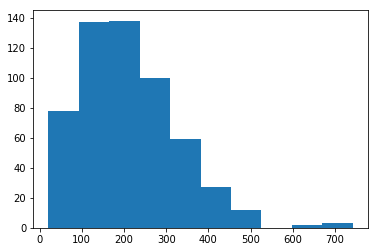

In [12]:
plt.hist(corpus.conversation_lengths)

In [13]:
corpus.max_conversation_length

742

In [14]:
corpus.max_utterance_length

87

(array([8.6845e+04, 2.3042e+04, 5.6490e+03, 1.8040e+03, 4.2200e+02,
        1.1900e+02, 2.2000e+01, 7.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([ 1. ,  9.6, 18.2, 26.8, 35.4, 44. , 52.6, 61.2, 69.8, 78.4, 87. ]),
 <a list of 10 Patch objects>)

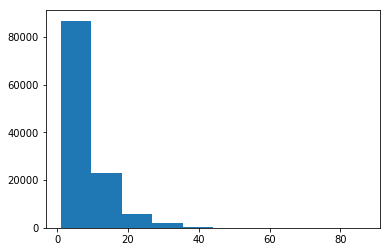

In [15]:
plt.hist(corpus.utterance_lengths)

In [21]:
np.percentile(corpus.utterance_lengths, 99)

31.0

In [20]:
np.percentile(corpus.conversation_lengths, 99)

518.8000000000002

In [3]:
from math import floor
floor(65*0.83)

53

In [42]:
from random import shuffle
l = [1,2,3]
shuffle(l)
l

[2, 1, 3]

In [48]:
from collections import Counter
test = Counter()
test["jake"] +=1
test["jake"] +=1
test["jake"] +=1
test["diana"] +=1

In [50]:
test2 = Counter()
test2["jake"] +=1
test2["jake"] +=1
test2["jake"] +=1
test2["diana"] +=1

In [51]:
test + test2

Counter({'jake': 6, 'diana': 2})

In [54]:
test += test2

In [55]:
test

Counter({'jake': 9, 'diana': 3})

TypeError: unhashable type: 'slice'